# Sentiment Analysis of Pepper Spray Tweets

This analysis assigns sentiment scores to Tweets containing five terms commonly associated with epper pray. Tweets were collected in seven-day increments utilizing Python script to scrape select fields via the Twitter API. We utlize the sentiment lexicon from the Tidytext sentiment file to assign sentiment scores to the Twitter texts by each search term per seven-day period. Additionaly, we examine the lexical diversity of the text by search term and time period to explore the possibility that lexical richness and sentiment may have a correlation. The ulitmate goal of this analysis is to understand the baseline sentiment associated with Tweets based on the associated pepper spray term, how sentiment differs between terms, and how sentiment changes over time. The ultimate goal of this analysis is to arm a Missoulan pepper spray producer with information about public sentiment towards like products depending on how the product is portrayed. 

###  Data Set 

These data were collected between Oct 11 - Nov 9, 2020 from 52,370 tweets. Tweets were selected if they contained one of five search terms: 'teargas,' 'pepperspray,' 'mace,' 'nonlethal,' and 'self-defense.' The code to used to scrape these data had a cap on tweets per search term of 10,000. Only 'mace' tweets in the first seven-day period reached this limit. These terms appear as words (strings) and are not limited to use as a hashtag (despite the misleading name in the schema). The full schema for this data set is displayed below.

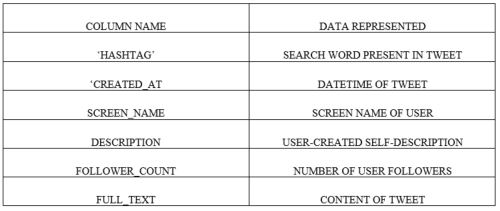

Tweet data has been broken up into four txt files, labled with the date of collection. For this analysis, we will focus specficially on the fields of 'hashtag' and 'full_text' to create dictionaries of text for sentiment scoring. The below cells contain the code for this analysis.

In [4]:
#Importing necessary and useful libraries for this analysis
import random
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from collections import defaultdict
import numpy as np
from nltk.probability import FreqDist

In [5]:
tweets = defaultdict(list) #creating a dictionary with search terms (keywords) as keys and the text as the values

In [6]:
#Creating a dictionary of words with sentiment scores from the tidytext file
sentiment_scores = {}

with open("tidytext_sentiments.txt",'r') as infile :
    next(infile)
    for line in infile.readlines() :
        line = line.strip().split("\t")
        if line[1] == "positive" :
            sentiment_scores[line[0]] = 1
        else :
            sentiment_scores[line[0]] = -1

In [36]:
#Individually opening and scoring each of the four txt files
with open("20201109_Sentiment_tweets.txt",'r', encoding = 'UTF-8') as infile :
    next(infile)
    for idx, line in enumerate(infile.readlines()) :
        #these lines are required because I cast the entire list to a string in my scrape code (don't do that) rather
        #than using list comprehension to cast each element as a string
        line = line.strip().strip("[").strip("]").replace("'","").split("\t")
        line = [element.strip().replace("\\n"," ").replace("\n"," ") for element in line]
        
        keyword = line[0]
        tweet = line[5]
        
        tweets[keyword].append(tweet)    

In [37]:
# Comparing words from the tweet dict and the sentiment dict and assigning scores by search terms (keywords) 
scores = defaultdict(int)

for kw, tweet_list in tweets.items() :
    for tweet in tweet_list :

        tweet = [w.lower() for w in tweet.split()]
        
        for word in tweet :
            if word in sentiment_scores :
                scores[kw] += sentiment_scores[word]

In [38]:
#Displaying the scores for this txt file
scores

defaultdict(int,
            {'teargas': -129,
             'pepperspray': 17,
             'nonlethal': -188,
             'mace': -10438,
             'selfdefense': 588})

In [ ]:
#writing a new txt file with sentiment scores for words in tweet text matching words in sentiment dict
with open("20201109_Sentiment_scores.txt",'w') as ofile :
    ofile.write("word\tscore\n")
    for idx, score in enumerate(scores) :
        ofile.write("\t".join([str(idx+1),str(score)]) + "\n")

In [43]:
#Checking lexical diversity by search term
len(set(tweets['nonlethal']))/len(tweets['nonlethal'])

0.9042056074766355

### Results

The figures below display the total tweets by search term over the time period covered by our data collection. We can see that 'mace' received the most tweets. This metric is slightly misleading as a number of the tweets containing 'mace' are referring to the metal weapon and not the chemical deterent. Further filtering will be required to eleminate these tweets from consideration. Tweet totals are broken into two graphs for ease of display.

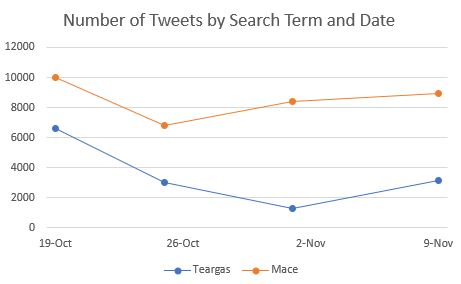

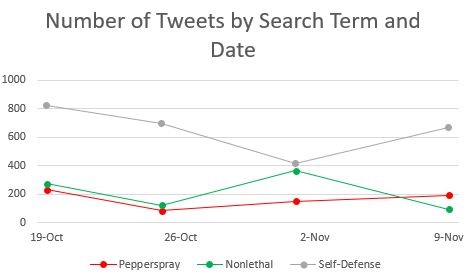

It is worth noting that our collection period captures two signficant events. The first event is the 11 Oct shooting of a demonstrator in Denver during a confrontation between left and right-wing factions. Reportedly, the demonstrator used pepper spray on a security guard before the security guard engaged the demonstrator with a firearm. The second event is really a series of events related to the US Presidential election. Throughout the summer of 2020, law enforcement organizations increasingly encountered demonstrators protesting the George Floyd killing in Minnesota and White House reactions to the Black Lives Matter movement, to include using riot control agent to clear a street ahead of a photo shoot of the President in front of St. John's church. We believe the combination of these events has elevated the total number of tweets related to pepper spray, but will need to conduct further scrapes during non-protest timelines to determine the extent to which the number of such tweets is elevated in these data. 

Sentiment scores by search term and time are displayed in the next two graphs. 'Positive' words receive a '+1' while 'negative' words receive a '-1.' The tally for each search term by collection period are shown below.

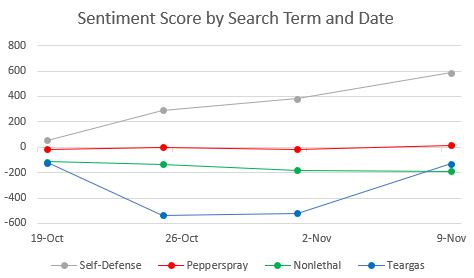

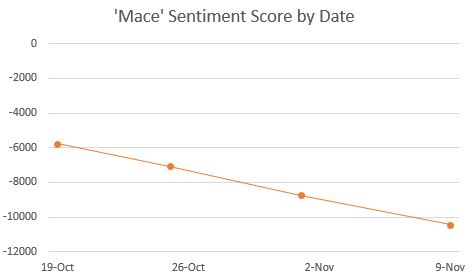

These graphs show that tweets associated with 'self-defense' appear to contain the most 'positive' sentiment. 'Mace' receives overwhelmingly negative sentiment scores, which may be influence by the dual-use of the word 'mace' that we have already described. Some might argue that 'mace' receives such low scores because of how many more 'mace' tweets are contained in this data set, yet that appears unlikely given 'teargas' (the second-most tweeted search word) receives much more 'positive' scores. The sentiment score associcated with 'mace' also becomes increasingly 'negative' towards 9 Nov, and does not appear to correlate directly with any change in the number of 'mace' tweets.  

Lastly, we reviewed the lexical diversity of the tweets per search term to understand if the 'richness' of tweet text had any obvious correaltions with sentiment scores. Interestingly, the least-rich text ('self-defense') is associated with the highest sentiment score.

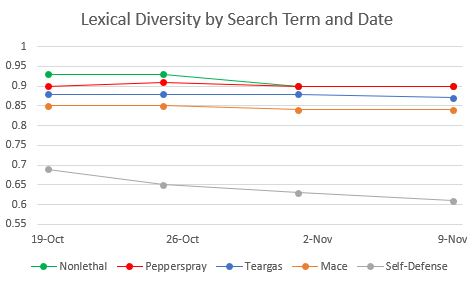

Lexical diversity is measured as a percentage. The above chart is truncated to reflect a diversity range of .55-1 because no search term scored below .55 and doing so made it easier to distinguish individual search terms in the visualization. We can see that diversity remains consistent amongst search terms.

### Recommendations

Based on this analysis, we recommend that marketing elements within chemical deterent companies focus social media efforts using a 'self-defense' verbiage to capitialize on the existing positive sentiment surrounding this industry. Beyond mere product differentiation, firms would do well to avoid an association with 'tear gas' or 'mace' as those terms have clear negative connotations with Twitter users like those we have sampled. Future analysis should focus on filtering the 'mace' search term to eleminate role-play and gaming references, and more analysis should be focused on sub-categories and phrases within the self-defense industry to articulate which specific terms resonate most 'postively' on social media.